In [ ]:
!pip install textblob
from textblob import TextBlob
! pip install newspaper3k
! pip install urllib3

In [ ]:
from __future__ import unicode_literals
from nltk.corpus import stopwords, wordnet
def GetArticles(query, secret, url):
    parameters = {
        'q': query, # query phrase
        'pageSize': 10,  # maximum is 100
        'apiKey': secret # your own API key
    }

    # Make the request
    response = requests.get(url, params=parameters)
    # Convert the response to JSON format
    response_json = response.json()
    
    urls=[] #Create empty list for urls
    data =[] #Create empty list for titles and publish dates
    from newspaper import Article
    for i in response_json['articles']: #Itterate through articles
        row=[] 
        row.append(i["title"]) #append title to row list
        row.append(i["publishedAt"]) #append publish date to row 
        urls.append(i['url']) #Append article URL to list
        data.append(row) #Append row list to data list
    for i in range(0 , len(urls)):

      article = Article(urls[i])
      article.download()
      article.parse()
      article.nlp()
      print(f'Title:{article.title}')
      print(f'Authors:{article.authors}')
      print(f'Publication Date:{article.publish_date}')
      print(f'Summary:{article.summary}')
      analyse = TextBlob(article.text)
      print(analyse.sentiment)
      i+= 1
   
       
    return urls
        


def DataPreprocessing(urls):
    stops = stopwords.words("english")
    lemmatizer = WordNetLemmatizer() #Create Lemmtizer object
    fdist =nltk.FreqDist() #Create frequency distribution object
    webpages=[] #Create an empty list for clean text bodys
    for i in urls:
        CleanedWords =[] #Empty list to hold all clean words
        webpage =requests.get(i).text #Make request and get webpage contents
        soup = BeautifulSoup(webpage, "html.parser") #Create beautiful soup object for article

        siteText=""
        for j in soup.find_all("p"): #Find all paragraph tags within the html page
            siteText += j.get_text() #Get text from each paragraph tag in document and append to 'text' variable


        siteText = re.sub(r"[^a-zA-Z0-9]+"," ", siteText) #Remove all none alphanumeric characters
        
        siteText = siteText.lower() #Convert to lowercase
        words = nltk.word_tokenize(siteText)
        more=['pakistan','say','said','would','like','also']
        
        for i in words:
            if i not in stops and i not in more and len(i)>3 : #If the word isnt a stop word then lemmatize it and add it to the list of cleaned words
                i = lemmatizer.lemmatize(i, pos=wordnet.NOUN)
                CleanedWords.append(i)
                fdist[i] +=1
        CleanedWords=" ".join(CleanedWords)
        print(CleanedWords)        
        webpages.append(CleanedWords) #Append list of cleaned words to webpages list
    return fdist, webpages


def Visualisations(fdist):
    fdist.plot(35) #Plotting Articles frequency distribution
    
    #Plotting word cloud for articles combined.
    wordcloud = WordCloud(max_font_size=50, max_words = 200, background_color="black").generate_from_frequencies(fdist)

    plt.figure(figsize=(13, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()









def TopicModel(webpages, start, end): #WARNING THIS TAKES A LONG TIME TO CALCULATE
    coherences =[] #Create empty list of coherences for plotting
    bestVal = 0 #Placeholder to hold number of topics with current best coherence score
    bestCoh = 0# Placeholder to hold current best coherence score
    
    for i in range(start,end+1):
        model=create_gensim_lsa_model(webpages, i) #Create LSI model
        cm = CoherenceModel(model=model, texts=webpages, coherence='c_v') #Create coherence model
        coherence = cm.get_coherence() #Compute coherence for previously created LSI model
        
        if coherence > bestCoh: #Check if new best coherence model has been found
            bestVal =i
            bestCoh = coherence
        coherences.append(coherence) #Save coherence
    
    #Plot line plot of coherence scores and number of topics
    p = sns.lineplot(x=[x for x in range (start, end+1)], y=coherences)
    p.set(xlabel='Number of topics', ylabel='Coherence score')
    plt.show()
    
    #Return best number of topics
    return bestVal



def GenerateTopics(webpages, bestVal):
    #Create another copy of best LSI model with best numbe of topics
    model=create_gensim_lsa_model(webpages, bestVal)
    
    #Itterate through topics found
    for i in model.show_topics(bestVal):
        #String Manipulate topics to print out the word makeup of each topic
        for j in i[1].split(" + "):
            vals = j.split("*")
            vals[1] = vals[1].replace('"','')
            print("%s & %s \\\\"%(vals[1], vals[0]))
        print()    


    


In [27]:
import requests 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords, wordnet
import nltk
import re
import seaborn as sns
from gensim.models import CoherenceModel, LsiModel
from gensim import corpora
from bs4 import BeautifulSoup
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
secret = "aa2f749927a444209a2401391fb73a41"
url = 'https://newsapi.org/v2/everything?'

#harcoded but customisable query
query1 = "regime change"
query2="pakistan regime"
query3="imported government"
query4="election in pakistan"
#minimum number of topics to check
TopicMinimumAmount = 7
#maximum number of topics to check
TopicMaximumAmount = 9

url1 = GetArticles(query1, secret, url)
url2 = GetArticles(query2, secret, url)
url3 = GetArticles(query3, secret, url)
url4 = GetArticles(query4, secret, url)



NameError: ignored

In [ ]:
urls=url1+url2+url3+url4
artcls="".join(urls)
with open('articles.txt', 'w') as file:
    file.write(artcls)

In [ ]:
fdist, webpages1 =DataPreprocessing(urls)
#Visualisations(fdist)

shimmering novel living autobiography deborah levy work inspires devotion literary author ever achievelast august author deborah levy began portrait starting point selfie eye penetrating lip sensuous head topped tower chestnut hair artist friend paul heber percy used photoshop pencil tracing paper reverse multiply image face drawing neatly laid grid satisfied time paint liked work morning hour long burst tiny attic studio levy came sitting bring painting dining room drink wine talk sitting traditional sense time could observe without feeling self conscious sometimes discus levy novel august blue finishing mostly everyday thing friend news exchanging recipe unblock sink levy heber percy told nothing conversation really everyday sort person make mundane remarkable even going bakery baguette becomes slightly magical thing friend novelist tash told friend talk thing event personage whole world people often remember first time kate bland audio producer party shoreditch warehouse levy sittin

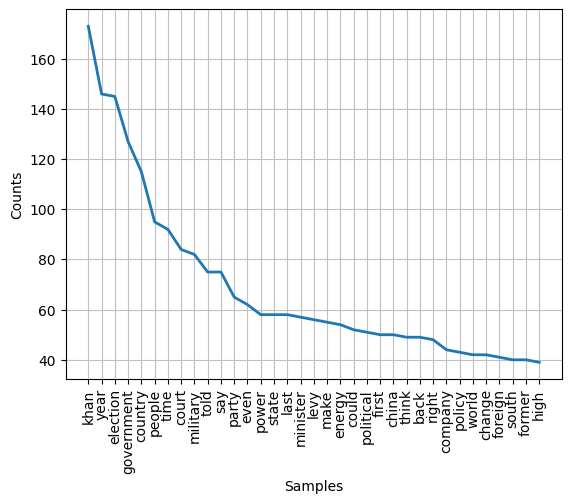

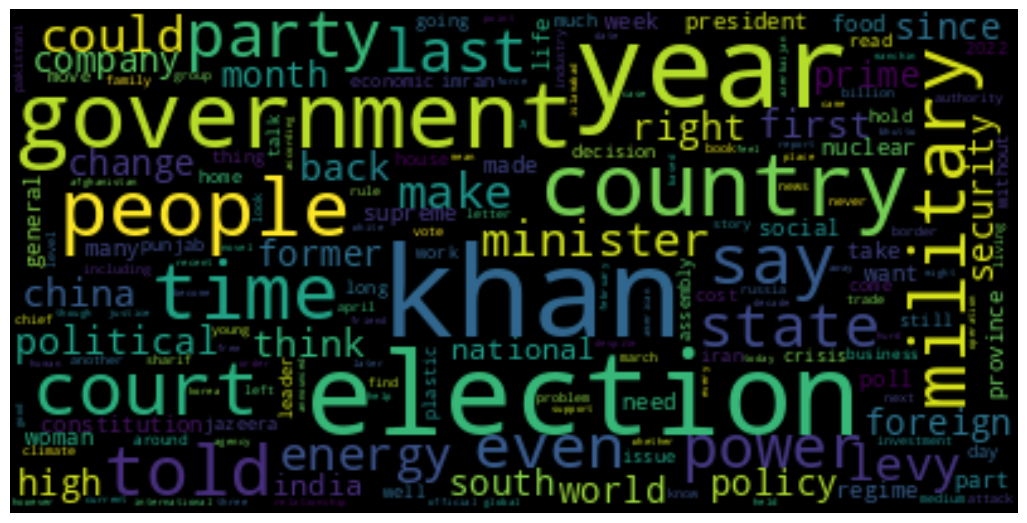

In [ ]:
Visualisations(fdist)

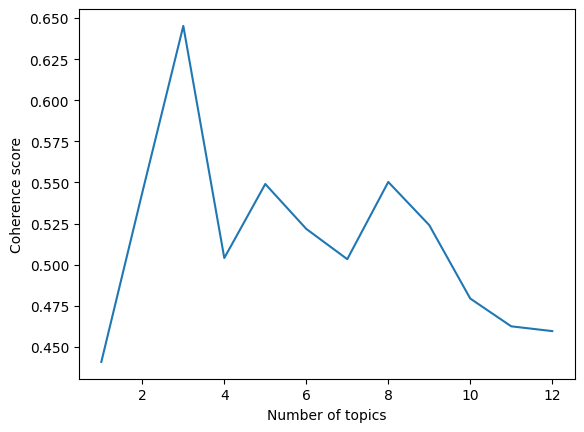

khan & 0.547 \\
election & 0.212 \\
say & 0.202 \\
year & 0.175 \\
country & 0.168 \\
military & 0.149 \\
people & 0.134 \\
government & 0.127 \\
china & 0.123 \\
political & 0.121 \\

levy & -0.462 \\
khan & 0.262 \\
told & -0.205 \\
novel & -0.179 \\
time & -0.162 \\
living & -0.159 \\
work & -0.159 \\
friend & -0.136 \\
book & -0.132 \\
character & -0.128 \\

election & -0.369 \\
government & -0.285 \\
khan & 0.273 \\
court & -0.258 \\
energy & -0.155 \\
constitution & -0.142 \\
say & 0.137 \\
supreme & -0.136 \\
company & -0.133 \\
jazeera & -0.124 \\



In [ ]:
bestVal = TopicModel(webpages, 1, 12)
GenerateTopics(webpages, bestVal)

In [ ]:
fdist

FreqDist({'khan': 173, 'year': 146, 'election': 145, 'government': 127, 'country': 115, 'people': 95, 'time': 92, 'court': 84, 'military': 82, 'told': 75, ...})

In [ ]:
webpages1=" ".join(webpages1)

In [ ]:
webpages1

'shimmering novel living autobiography deborah levy work inspires devotion literary author ever achievelast august author deborah levy began portrait starting point selfie eye penetrating lip sensuous head topped tower chestnut hair artist friend paul heber percy used photoshop pencil tracing paper reverse multiply image face drawing neatly laid grid satisfied time paint liked work morning hour long burst tiny attic studio levy came sitting bring painting dining room drink wine talk sitting traditional sense time could observe without feeling self conscious sometimes discus levy novel august blue finishing mostly everyday thing friend news exchanging recipe unblock sink levy heber percy told nothing conversation really everyday sort person make mundane remarkable even going bakery baguette becomes slightly magical thing friend novelist tash told friend talk thing event personage whole world people often remember first time kate bland audio producer party shoreditch warehouse levy sitti

In [29]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

def GetText(url):
    site = requests.get(url).text #Request html object from url
    soup = BeautifulSoup(site, "html.parser") #Create BeautifulSoup object
    text ="" 
    for j in soup.find_all("p"): #Find all paragraph tags within the html page
        text += j.get_text() #Get text from each paragraph tag in document and append to 'text' variable
    return text
def GenerateWordFrequencyDistribution(text):
    stops = set(stopwords.words("english"))
    words = word_tokenize(text) #tokenize text by words
    freqTable = dict()

    for word in words: #Itterate through all words in text
        word = word.lower() #Convert word to lowercase
        if word not in stops: #Ignore stopwords
            if word in freqTable:
                freqTable[word] += 1 #Add one to the word frequency if it has already been added to before
            else:
                freqTable[word] = 1  #Set the word frequency to one if it has not already been added to before
    return freqTable
def CalculateSentenceImportance (text, freqTable):
    sents = sent_tokenize(text)
    sentScores = dict()
    
    for sent in sents:
        for word, freq in freqTable.items():
            if word in sent.lower():
                if sent in sentScores:
                    sentScores[sent] += freq #Add the frequency of a word occuring to the sentence score if it has been added to before
                else: 
                    sentScores[sent] = freq  #Set score of a sentence to the score of the first word occuring in the sentence
    return sentScores, sents


def CalculateAverageSentenceImportance (sentScores):
    sumValues = 0
    for sentence in sentScores:
        sumValues += sentScores[sentence] #Calculate total sentence values
        
    return (sumValues / len(sentScores)) #Return average sentence value


def PerformExtractiveSummarisation(sentences, sentScores, average):
    summary = ""
    for sent in sentences:
        if (sentScores[sent] > (1.5 * average)): #Check if the sentence has a score greater than 1.5 times the average.
            summary += sent + " "
            
    return summary

In [30]:
url="https://tribune.com.pk/story/2364370/the-deepening-crisis-after-regime-change"
text=GetText(url)

In [21]:
text

"The key stakeholder and people’s expectationsPeaking inflationOne wonders why regime change took place in Pakistan and how internal crisis deepened after Imran Khan’s removalHistorically, no Pakistani Prime Minister has completed a five-year term — assassinated, hanged, or removed through the imposition of martial law or by the president under the 8th constitutional amendment. For the first time in Pakistan’s history, a regime change has taken place through a vote of no-confidence. Despite former Prime Minister Imran Khan’s allegations of a foreign conspiracy, this time the method for regime change was constitutional.Britannica defines regime change as “overthrowing a government considered illegitimate by an external force and its replacement with a new government according to the ideas or interests promoted by that force.” Cambridge dictionary defines regime change as “a complete change of government, especially one brought about by force.”In Western democracies, elected governments 

In [31]:
#Generate a frequency distribution based on previously acquired text
FreqTable = GenerateWordFrequencyDistribution(text)
FreqTable

{'key': 1,
 'stakeholder': 1,
 'people': 6,
 '’': 29,
 'expectationspeaking': 1,
 'inflationone': 1,
 'wonders': 1,
 'regime': 16,
 'change': 15,
 'took': 3,
 'place': 4,
 'pakistan': 14,
 'internal': 2,
 'crisis': 8,
 'deepened': 3,
 'imran': 9,
 'khan': 10,
 'removalhistorically': 1,
 ',': 71,
 'pakistani': 2,
 'prime': 5,
 'minister': 5,
 'completed': 2,
 'five-year': 2,
 'term': 2,
 '—': 1,
 'assassinated': 1,
 'hanged': 1,
 'removed': 3,
 'imposition': 1,
 'martial': 1,
 'law': 2,
 'president': 2,
 '8th': 1,
 'constitutional': 3,
 'amendment': 1,
 '.': 32,
 'first': 2,
 'time': 5,
 'history': 2,
 'taken': 1,
 'vote': 4,
 'no-confidence': 4,
 'despite': 2,
 'former': 2,
 'allegations': 4,
 'foreign': 3,
 'conspiracy': 5,
 'method': 1,
 'constitutional.britannica': 1,
 'defines': 2,
 '“': 4,
 'overthrowing': 1,
 'government': 11,
 'considered': 1,
 'illegitimate': 1,
 'external': 1,
 'force': 2,
 'replacement': 1,
 'new': 3,
 'according': 1,
 'ideas': 1,
 'interests': 1,
 'promoted'

In [32]:
#Generate sentence values for each sentence in text back on frequency of work occurance.
sentScores, Sentences = CalculateSentenceImportance(text, FreqTable)
print(sentScores)


{'The key stakeholder and people’s expectationsPeaking inflationOne wonders why regime change took place in Pakistan and how internal crisis deepened after Imran Khan’s removalHistorically, no Pakistani Prime Minister has completed a five-year term — assassinated, hanged, or removed through the imposition of martial law or by the president under the 8th constitutional amendment.': 273, 'For the first time in Pakistan’s history, a regime change has taken place through a vote of no-confidence.': 200, 'Despite former Prime Minister Imran Khan’s allegations of a foreign conspiracy, this time the method for regime change was constitutional.Britannica defines regime change as “overthrowing a government considered illegitimate by an external force and its replacement with a new government according to the ideas or interests promoted by that force.” Cambridge dictionary defines regime change as “a complete change of government, especially one brought about by force.”In Western democracies, ele

In [33]:
AverageValue = CalculateAverageSentenceImportance(sentScores)
AverageValue

166.42857142857142

In [34]:
Summary = PerformExtractiveSummarisation(Sentences,sentScores, AverageValue)

print(Summary)

The key stakeholder and people’s expectationsPeaking inflationOne wonders why regime change took place in Pakistan and how internal crisis deepened after Imran Khan’s removalHistorically, no Pakistani Prime Minister has completed a five-year term — assassinated, hanged, or removed through the imposition of martial law or by the president under the 8th constitutional amendment. Despite former Prime Minister Imran Khan’s allegations of a foreign conspiracy, this time the method for regime change was constitutional.Britannica defines regime change as “overthrowing a government considered illegitimate by an external force and its replacement with a new government according to the ideas or interests promoted by that force.” Cambridge dictionary defines regime change as “a complete change of government, especially one brought about by force.”In Western democracies, elected governments are removed through a vote of no-confidence or popular protests, which compel the party in power to replace 